### Parámetro de Hubble H(z)

In [49]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

#Constantes
H_0 = 70
c= 3e5 

In [50]:
f = open("C:/Users/antoc/Downloads/PortableGit/practica2024/hub_data.txt")
#print(f.readlines())
lineas2 = f.readlines()

# Divide cada línea en columnas usando espacio como separador
datos_separados2 = [linea.strip().split(' ') for linea in lineas2]

datos= []
for fila in datos_separados2:
    datos.append(fila)
    #print(fila)

z = []
for i in range(len(datos)):
      a = float(datos[i][0])
      z.append(a)
#print('z:', z)

H = []
for i in range(len(datos)):
   if datos[i][1] == '':
      a = float(datos[i][2])
      H.append(a)
   else:
      a = float(datos[i][1])
      H.append(a)
#print('H:', H)

desv = []
for i in range(len(datos)):
    a = float(datos[i][2])
    desv.append(a)
#print('desv:', desv)


Creando la ecuación física del parámetro de Hubble para un universo con radiación, materia y constante cosmológica $\Lambda$, se tiene:
$$H(z) = H_0 \left[\Omega_r (1+z)^4 + \Omega_m(1+z)^3 + \Omega_l + \Omega_k(1+z)^2 \right]^{1/2}$$

In [51]:
#Parámetros
omega_r = 8.4e-5
omega_m = 0.3
omega_l = 0.7
omega_k = 0

#Creamos la función teórica
array_z = np.array(z)

H_t = np.zeros(len(array_z))
H_t = H_0* ((omega_r * (1+array_z)**4) + omega_m * (1+array_z)**3 + omega_l + omega_k* (1+array_z)**2)**(1/2)

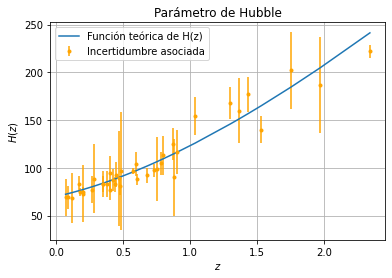

In [52]:
yerr = desv
plt.xlabel('$ z $')
plt.ylabel('$ H(z) $')
plt.title('Parámetro de Hubble')
plt.plot(array_z, H_t, label='Función teórica de H(z)')
plt.errorbar(z, H, yerr=yerr, fmt='.', color = 'orange', label = 'Incertidumbre asociada')
plt.legend()
plt.grid(True)
plt.show()

Del mismo orden de magnitud esperado según "a 6% measurment of the Hubble parameter..." (página 14)

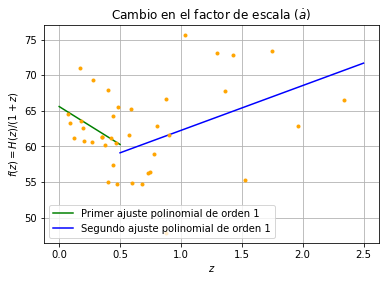

In [53]:
f = np.zeros_like(H)
for i in range(len(H)):
  f[i] = H[i]/(1+ z[i])

model2 = np.poly1d(np.polyfit(z[:20], f[:20], 1))
polyline2 = np.linspace(0, 0.5, 50)
plt.plot(polyline2, model2(polyline2), color='green', label = 'Primer ajuste polinomial de orden 1')
model3 = np.poly1d(np.polyfit(z[20:], f[20:], 1))
polyline3 = np.linspace(0.5, 2.5, 50)
plt.plot(polyline3, model3(polyline3), color='blue', label = 'Segundo ajuste polinomial de orden 1')

plt.xlabel('$ z $')
plt.ylabel('$ f(z) = H(z)/(1+z)$')
plt.title('Cambio en el factor de escala $(\dot{a})$')
plt.plot(z, f,'.', color = 'orange')
plt.legend()
plt.grid(True)
plt.show()

Del mismo orden de magnitud esperado según "a 6% measurment of the Hubble parameter..." (página 17)

Se obtuvo $D_L$ a partir de datos del parámetro de Hubble utilizando la ecuación $$D_L(z) = c \dfrac{1+z}{H_0} \int_0^z{dz}{\dfrac{1}{E(z)}}$$

Graficamos la función teórica de $D_L$ junto a los datos. Se tiene que $\Omega_s = \Omega_r + \Omega_m + \Omega_\Lambda + \Omega_k = 1$  a partir de lo que se fijan los parámetros. 

Esta función está dada por $$D_L(z) = \dfrac{c}{H_0}(1+z) \int_{0}^{z} \dfrac{1}{\sqrt{\Omega_r (1+z)^4 + \Omega_m(1+z)^3 + \Omega_l + \Omega_k(1+z)^2}} \,dz$$

Luego, tomando curvatura $\Omega_k = 0$ se tiene:

In [54]:
E = np.zeros_like(H)
for i in range(len(H)):
    E[i] = H[i]/H_0

def regla_trapecio_numerica(x, y, j):
    integral = 0
    n = j
    for i in range(1, n):
        integral += (x[i] - x[i - 1]) * (y[i] + y[i - 1])/2

    return integral

# Calcular la aproximación de la integral utilizando la regla del trapecio

resultado_integral1 = np.zeros_like(H)
for j in range(len(H)):
    resultado_integral1[j] = regla_trapecio_numerica(z, 1/E, j)
    #print("El resultado de la integral es:", resultado_integral[j])

D_LH = np.zeros_like(H)
for i in range(len(H)):
    D_LH[i]= (c/H_0) * (1 + z[i]) * resultado_integral1[i]


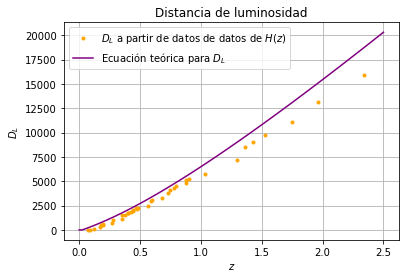

In [55]:
z_cualquiera = np.linspace(0,2.5,100)

def regla_trapecio_numerica(x, y, j):
    integral = 0
    n = j
    for i in range(1, n):
        integral += (x[i] - x[i - 1]) * (y[i] + y[i - 1])/2
    return integral

#Función a integrar
func2 = ((omega_r * (1+z_cualquiera)**4) + omega_m * (1+ z_cualquiera)**3 + omega_l + omega_k* (1+z_cualquiera)**2)**(-1/2)

# Calcular la aproximación de la integral utilizando la regla del trapecio
resultado_integral = np.zeros_like(z_cualquiera)
for j in range(len(z_cualquiera)):
    resultado_integral[j] = regla_trapecio_numerica(z_cualquiera, func2, j)
    #print("El resultado de la integral es:", resultado_integral[j])

#Ecuación
DL_t_H= (c/H_0)*(1+ z_cualquiera)* resultado_integral


plt.plot(z, D_LH, '.', color = 'orange', label= '$D_L$ a partir de datos de datos de $H(z)$')
plt.plot(z_cualquiera, DL_t_H, color = 'purple', label= 'Ecuación teórica para $D_L$')

plt.xlabel('$ z $')
plt.ylabel('$ D_L$')
plt.title('Distancia de luminosidad')
plt.grid(True)
plt.legend()
plt.show()

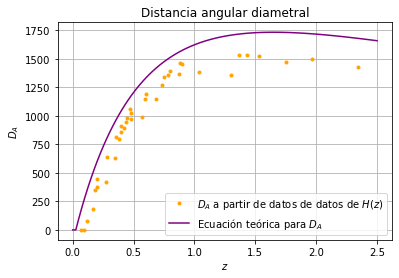

In [56]:
d_a = np.zeros_like(D_LH)
for i in range(len(D_LH)):
    d_a[i] = D_LH[i] * (1/((1+z[i])**2))

d_a_H0_c = np.zeros_like(D_LH)
for i in range(len(D_LH)):
    d_a_H0_c[i] = d_a[i]* H_0/c


DA_t_H = DL_t_H * ((1+z_cualquiera)**(-2))

plt.plot(z, d_a, '.', color = 'orange', label= '$D_A$ a partir de datos de datos de $H(z)$')
plt.plot(z_cualquiera, DA_t_H, color = 'purple', label= 'Ecuación teórica para $D_A$')


plt.xlabel('$ z $')
plt.ylabel('$ D_A$')
plt.title('Distancia angular diametral')
plt.grid(True)
plt.legend()
plt.show()

Se pudo notar que al aumentar la curvatura a 0.2, la curva teórica concuerda con los datos.